In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [6]:
dataset = pd.read_csv('data.csv', on_bad_lines='skip')

In [7]:
dataset.shape

(669640, 2)

In [8]:
dataset.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [9]:
dataset.isna().sum()

password    1
strength    0
dtype: int64

In [10]:
dataset = dataset.dropna()

In [11]:
dataset.isna().sum()

password    0
strength    0
dtype: int64

In [12]:
X = dataset.iloc[:, 0].values
y = dataset.iloc[:, 1].values

In [14]:
def word_to_char(input):
    character = []
    for i in input:
        character.append(i)
    return character

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(tokenizer=word_to_char)
X = vectorizer.fit_transform(X)

C:\Users\BASHA\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X_train.shape

(535711, 153)

In [18]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=99, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=99, random_state=0)

In [19]:
y_pred = classifier.predict(X_test)

<Axes: >

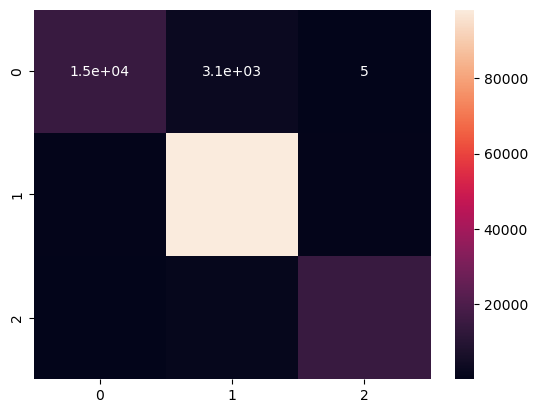

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [21]:
accuracy_score(y_test, y_pred)

0.9563198136312048

In [22]:
x_pred = np.array(['new_password@!'])
x_pred = vectorizer.transform(x_pred)
classifier.predict(x_pred)

array([2], dtype=int64)

In [23]:
import pickle

In [24]:
pickle.dump(classifier, open('model.pkl', 'wb'))
pickle.dump(vectorizer, open('vector.pkl', 'wb'))